<a href="https://colab.research.google.com/github/Syauqi366/praktikum-machine-learning-/blob/main/praktikummandiri4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/Praktikum_ml/Praktikum4ML"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    RocCurveDisplay, ConfusionMatrixDisplay
)

In [ ]:
path = "/content/gdrive/MyDrive/Praktikum_ml/Praktikum4ML"
df = pd.read_csv(path + "/data/calonpembelimobil.csv")
print("=== 5 Data Teratas ===")
display(df.head())

print("\n=== Informasi Dataset ===")
print(df.info())


=== 5 Data Teratas ===


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1



=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB
None


In [ ]:
print("\n=== Jumlah Missing Value Tiap Kolom ===")
print(df.isnull().sum())

print("\n=== Nilai Unik per Kolom ===")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


=== Jumlah Missing Value Tiap Kolom ===
ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

=== Nilai Unik per Kolom ===
ID: [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  

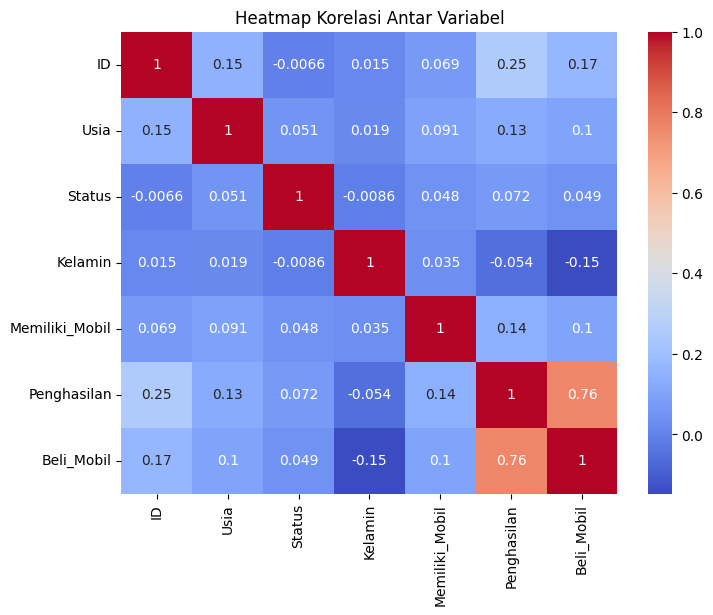

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [ ]:
X = df.drop(columns=['ID', 'Beli_Mobil'])
y = df['Beli_Mobil']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")

X_train shape: (800, 5)
X_test shape : (200, 5)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)


=== HASIL EVALUASI MODEL ===
Akurasi     : 0.9300
Precision   : 0.9829
Recall      : 0.9055
F1 Score    : 0.9426
ROC-AUC     : 0.9768


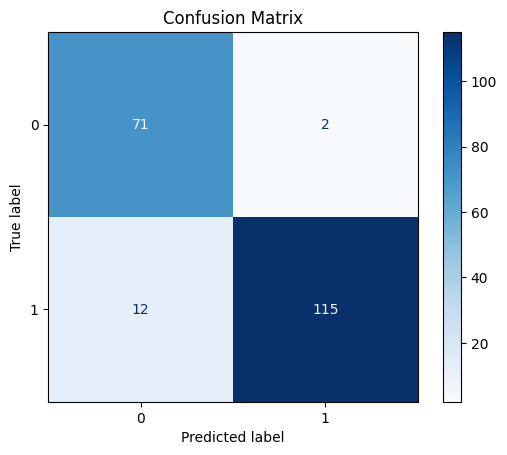

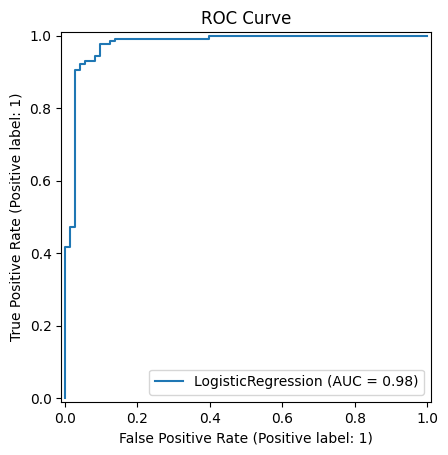


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        73
           1       0.98      0.91      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.94      0.93      0.93       200



In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n=== HASIL EVALUASI MODEL ===")
print(f"Akurasi     : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1 Score    : {f1:.4f}")
print(f"ROC-AUC     : {roc_auc:.4f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

# Classification Report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\n=== VALIDASI SILANG (CROSS VALIDATION) ===")
print("Akurasi tiap fold :", scores)
print("Rata-rata Akurasi :", np.mean(scores))
print("Standar Deviasi   :", np.std(scores))


=== VALIDASI SILANG (CROSS VALIDATION) ===
Akurasi tiap fold : [0.785 0.91  0.955 0.945 0.94 ]
Rata-rata Akurasi : 0.907
Standar Deviasi   : 0.06281719509815761


In [ ]:
coef_df = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien (log-odds)': model.coef_[0],
    'Odds Ratio (exp)': np.exp(model.coef_[0])
    })
display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (exp)
0,Usia,-0.045073,0.955928
1,Status,-0.132093,0.876259
2,Kelamin,-0.596863,0.550536
3,Memiliki_Mobil,0.078968,1.082169
4,Penghasilan,4.568333,96.383273


In [ ]:
data_baru = pd.DataFrame({
    'Usia': [28, 45],
    'Status': [1, 3],
    'Kelamin': [0, 1],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [200, 300]
})

data_baru_scaled = scaler.transform(data_baru)
prediksi = model.predict(data_baru_scaled)
probabilitas = model.predict_proba(data_baru_scaled)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = probabilitas
hasil['Prediksi'] = prediksi
hasil['Prediksi_Label'] = hasil['Prediksi'].map({1: 'Beli Mobil', 0: 'Tidak Beli'})

print("\n=== HASIL PREDIKSI DATA BARU ===")
display(hasil)


=== HASIL PREDIKSI DATA BARU ===


,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prob_Beli_Mobil,Prediksi,Prediksi_Label
0,28,1,0,0,200,0.287297,0,Tidak Beli
1,45,3,1,1,300,0.925209,1,Beli Mobil
